<a href="https://www.kaggle.com/code/ssevinc/ridge-regression-implementation?scriptVersionId=226002943" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score



In [2]:
np.random.seed(42)
mean2, std_deviation2 = 5.5 , 1.5
study_hours = np.round(np.random.normal(mean2,std_deviation2,1000),decimals=1)
base_grade = 10
slope = 7
random_noise = np.random.normal(0,6,1000)
student_grades = np.round(base_grade + slope *study_hours +random_noise,decimals=1)
student_grades = np.clip(student_grades,0,200)


In [3]:
y = student_grades
x = study_hours.reshape(-1, 1)
x_train,x_test,y_train,y_test = train_test_split(
    x,y, test_size=0.2,random_state=42
)

In [4]:
data =pd.DataFrame({"student grades": student_grades,"study hours": study_hours})
data.head(50)


,student grades,study hours
0,61.8,6.2
1,52.6,5.3
2,55.9,6.5
3,60.7,7.8
4,49.9,5.1
5,48.1,5.1
6,70.7,7.9
7,60.7,6.7
8,49.9,4.8
9,50.9,6.3


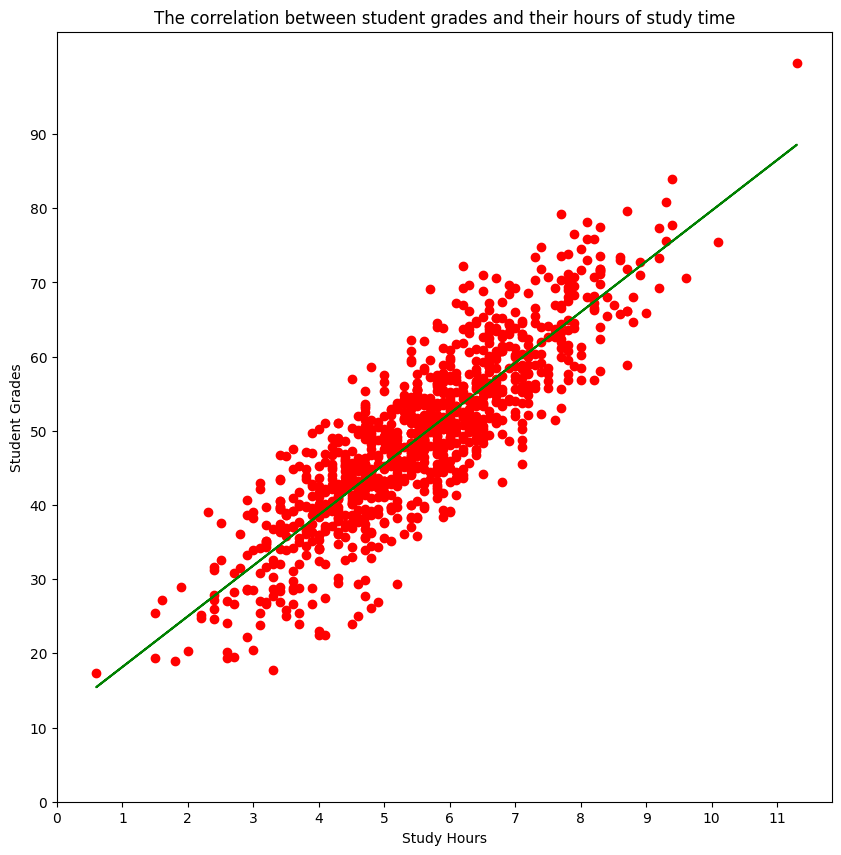

In [5]:
plt.figure(figsize=(10,10))
plt.scatter(y=student_grades,x=study_hours,color='red')
slope,intercept = np.polyfit(study_hours,student_grades,1)
least_squares_line = slope*study_hours +intercept
plt.plot(study_hours,least_squares_line ,color='green')
plt.xticks(np.arange(0,max(study_hours),step=1))
plt.yticks(np.arange(0,max(student_grades),step=10))
plt.title('The correlation between student grades and their hours of study time')
plt.xlabel('Study Hours')
plt.ylabel('Student Grades')
plt.show()

In [6]:
class RidgeRegression:
    def __init__(self,alpha = 1.0):
        self.alpha = alpha
        self.weight = None

    def fit(self,x,y):
        n,m = x.shape
        I = np.eye(m)

        self.weights = np.linalg.inv(x.T @ x + self.alpha*I)@ x.T @ y
        
    def predict(self,x):
        return x @ self.weights
    
    

In [7]:
ridge = RidgeRegression(alpha=1.0)
ridge.fit(x_train,y_train)
y_pred_ridge = ridge.predict(x_test)
r2 = r2_score(y_test, y_pred_ridge)
print(f"accuracy score: {np.round(r2*100)}%")

accuracy score: 71.0%


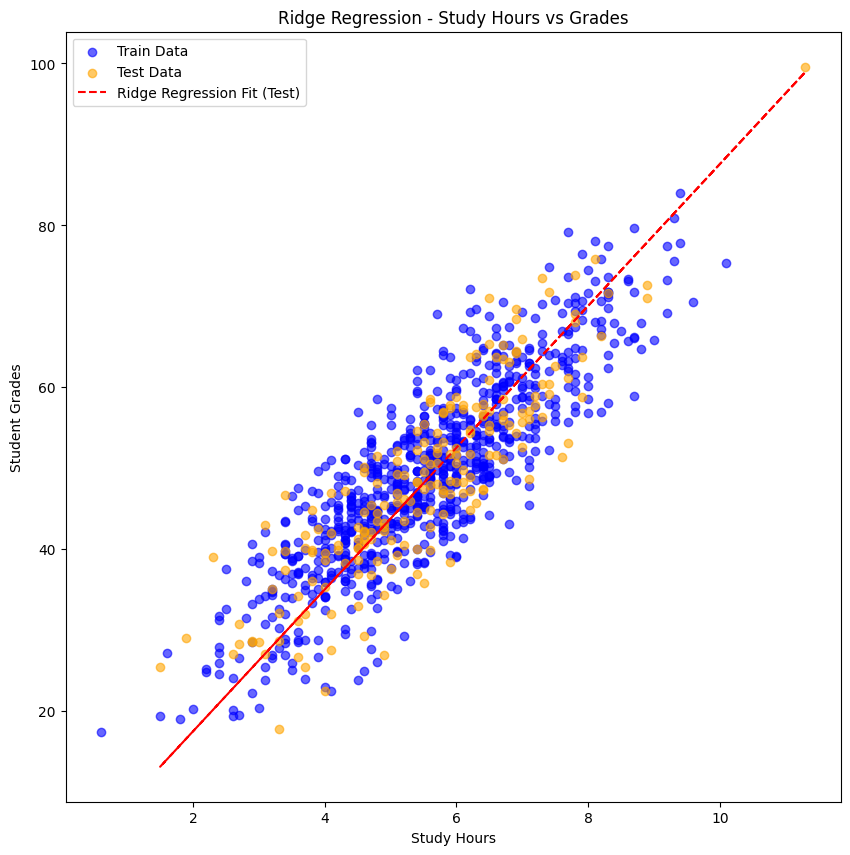

In [8]:
plt.figure(figsize=(10,10))
plt.scatter(x_train,y_train,label = "Train Data", color= 'blue',alpha =0.6)
plt.scatter(x_test, y_test, label="Test Data", color='orange', alpha=0.6)
plt.plot(x_test, y_pred_ridge, label="Ridge Regression Fit (Test)", color='red', linestyle='--')

plt.xlabel("Study Hours")
plt.ylabel("Student Grades")
plt.legend()
plt.title("Ridge Regression - Study Hours vs Grades")
plt.show()